### Data extraction
Extract data from MIMIC-III

In [10]:
import pandas as pd
import nltk.data
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [11]:
# Step 1

alive_df = pd.read_csv('alive_df.csv')
dead_df = pd.read_csv('dead_df.csv')

In [12]:
print(f"Number of patients in label_0: {dead_df['SUBJECT_ID_x'].nunique()}")
print(f"Number of patients in label_1: {alive_df['SUBJECT_ID_x'].nunique()}")

Number of patients in label_0: 252
Number of patients in label_1: 1167


In [13]:
import json
# Read json
with open('word_dict.json', 'r') as fp:
    word_dict = json.load(fp)

In [14]:
from functions import find_cooc_per_patient

In [15]:
patient_node_0, patient_cooc_0, patient_note_num_0 = find_cooc_per_patient(dead_df, word_dict, 0.15)
patient_node_1, patient_cooc_1, patient_note_num_1 = find_cooc_per_patient(alive_df, word_dict, 0.15)

100%|██████████| 46134/46134 [06:28<00:00, 118.72it/s]


In [16]:
# Leave only unique values
patient_node_set = set()

for k, v in patient_node_0.items():
    for item in v:
        patient_node_set.add(item)
    
for k, v in patient_node_1.items():
    for item in v:
        patient_node_set.add(item)
        

In [17]:
patient_square_node_data = pd.DataFrame({'node':list(patient_node_set)})
patient_square_node_data

,node
0,erythro
1,hepati
2,nitroglycerin
3,modifi
4,sxn'ing
...,...
628,quinton
629,autopsi
630,silent
631,ambien


In [18]:
patient_square_node_id_data = patient_square_node_data.set_index("node")
patient_square_node_id_data['subject'] = "positive"
patient_square_node_id_data

,subject
node,
erythro,positive
hepati,positive
nitroglycerin,positive
modifi,positive
sxn'ing,positive
...,...
quinton,positive
autopsi,positive
silent,positive


In [19]:
patient_subjects = patient_square_node_id_data["subject"]
patient_subjects

node
erythro          positive
hepati           positive
nitroglycerin    positive
modifi           positive
sxn'ing          positive
                   ...   
quinton          positive
autopsi          positive
silent           positive
ambien           positive
underneath       positive
Name: subject, Length: 633, dtype: object

### word2vec embeddings

In [10]:
alive_df = pd.read_csv('alive_df.csv')
dead_df = pd.read_csv('dead_df.csv')

In [11]:
alive_df.shape

(46134, 2)

In [12]:
dead_df.shape

(11895, 2)

In [13]:
all_notes_df = pd.concat([alive_df, dead_df])

In [14]:
all_notes_df.shape

(58029, 2)

In [15]:
all_notes_df.head(1)

,SUBJECT_ID_x,TEXT
0,68,Sinus tachycardia. Compared to the previous tr...


In [37]:
# # https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456
# import string
# import re
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from tqdm import tqdm

# text_lines = list()
# lines = all_notes_df['TEXT'].values.tolist()

# # words that do not have meaning (can be modified later)
# USELESS_WORDS = ["a", "the", "he", "she", ",", ".", "?", "!", ":", ";", "+", "*", "**"\
#                  "your", "you"]

# # count up the frequency of every word in every disease file
# stemmer = PorterStemmer()
# # create set of words to ignore in text
# stop_words = set(stopwords.words('english'))

# for line in tqdm(lines):
#     #
#     line = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', line)
#     tokens = word_tokenize(line)
#     #convert to lower case
#     tokens = [w.lower() for w in tokens]
#     # remove punctuation from each word
#     table = str.maketrans('','', string.punctuation)
#     stripped = [w.translate(table) for w in tokens]
#     # remove remaining tokens that are not alphabetic
#     words = [word for word in stripped if word.isalpha()]
#     # filter out stop words
#     stop_words = set(stopwords.words('english'))
#     words = [w for w in words if not w in stop_words]
#     # Stemming
#     words = [stemmer.stem(word.lower()) for word in words]
#     text_lines.append(words)
    
"""Result of encoding, 4 words left unrecognized:
sxn'ing
^th
tf'ing
^rr
"""

"Result of encoding, 4 words left unrecognized:\nsxn'ing\n^th\ntf'ing\n^rr\n"

In [38]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm

text_lines = list()
lines = all_notes_df['TEXT'].values.tolist()

# words that do not have meaning (can be modified later)
USELESS_WORDS = ["a", "the", "he", "she", ",", ".", "?", "!", ":", ";", "+", "*", "**"\
                 "your", "you"]

# count up the frequency of every word in every disease file
stemmer = PorterStemmer()
# create set of words to ignore in text
stop_words = set(stopwords.words('english'))

for word in USELESS_WORDS:
    stop_words.add(word)

for line in tqdm(lines):
    
    line = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', line)
    tokens = word_tokenize(line)
#     tokens = [w.lower() for w in tokens]
    words = [stemmer.stem(word.lower()) for word in tokens]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    
    text_lines.append(words)
    



  0%|          | 0/58029 [00:00<?, ?it/s]

  0%|          | 24/58029 [00:00<04:19, 223.37it/s]

  0%|          | 48/58029 [00:00<04:14, 227.71it/s]

  0%|          | 71/58029 [00:00<04:14, 227.91it/s]

  0%|          | 97/58029 [00:00<04:05, 236.05it/s]

  0%|          | 128/58029 [00:00<03:52, 249.29it/s]

  0%|          | 158/58029 [00:00<03:43, 259.26it/s]

  0%|          | 199/58029 [00:00<03:18, 291.22it/s]

  0%|          | 236/58029 [00:00<03:05, 310.75it/s]

  0%|          | 268/58029 [00:00<03:05, 312.12it/s]

  1%|          | 300/58029 [00:01<03:06, 310.37it/s]

  1%|          | 332/58029 [00:01<03:23, 283.73it/s]

  1%|          | 365/58029 [00:01<03:16, 293.08it/s]

  1%|          | 395/58029 [00:01<03:35, 267.05it/s]

  1%|          | 439/58029 [00:01<03:10, 302.23it/s]

  1%|          | 472/58029 [00:01<04:02, 237.50it/s]

  1%|          | 511/58029 [00:01<03:35, 267.49it/s]

  1%|          | 542/58029 [00:01<03:39, 261.83it/s]

  1%|          | 571/58029 [00:02<03:45, 

 12%|█▏        | 6769/58029 [00:35<02:40, 319.41it/s]

 12%|█▏        | 6811/58029 [00:35<02:29, 343.12it/s]

 12%|█▏        | 6849/58029 [00:35<02:25, 351.90it/s]

 12%|█▏        | 6886/58029 [00:35<02:23, 356.53it/s]

 12%|█▏        | 6923/58029 [00:35<02:21, 360.06it/s]

 12%|█▏        | 6960/58029 [00:35<02:33, 333.19it/s]

 12%|█▏        | 6994/58029 [00:35<03:33, 239.49it/s]

 12%|█▏        | 7023/58029 [00:35<04:09, 204.63it/s]

 12%|█▏        | 7048/58029 [00:36<04:06, 207.04it/s]

 12%|█▏        | 7077/58029 [00:36<03:45, 226.40it/s]

 12%|█▏        | 7107/58029 [00:36<03:30, 241.70it/s]

 12%|█▏        | 7137/58029 [00:36<03:18, 256.40it/s]

 12%|█▏        | 7165/58029 [00:36<03:30, 241.48it/s]

 12%|█▏        | 7191/58029 [00:36<03:38, 232.31it/s]

 12%|█▏        | 7216/58029 [00:36<03:40, 230.88it/s]

 12%|█▏        | 7240/58029 [00:36<04:07, 204.87it/s]

 13%|█▎        | 7268/58029 [00:37<03:48, 221.82it/s]

 13%|█▎        | 7292/58029 [00:37<03:45, 225.35it/s]

 13%|█▎   

 25%|██▌       | 14585/58029 [01:08<04:13, 171.14it/s]

 25%|██▌       | 14607/58029 [01:08<04:53, 147.80it/s]

 25%|██▌       | 14640/58029 [01:08<04:05, 176.82it/s]

 25%|██▌       | 14674/58029 [01:08<03:30, 206.42it/s]

 25%|██▌       | 14700/58029 [01:09<03:31, 204.92it/s]

 25%|██▌       | 14725/58029 [01:09<04:51, 148.59it/s]

 25%|██▌       | 14745/58029 [01:09<05:21, 134.83it/s]

 25%|██▌       | 14763/58029 [01:09<05:25, 132.88it/s]

 25%|██▌       | 14797/58029 [01:09<04:27, 161.44it/s]

 26%|██▌       | 14833/58029 [01:09<03:43, 193.23it/s]

 26%|██▌       | 14870/58029 [01:09<03:11, 225.45it/s]

 26%|██▌       | 14907/58029 [01:10<02:49, 254.70it/s]

 26%|██▌       | 14939/58029 [01:10<02:44, 262.55it/s]

 26%|██▌       | 14973/58029 [01:10<02:33, 280.10it/s]

 26%|██▌       | 15008/58029 [01:10<02:24, 297.27it/s]

 26%|██▌       | 15049/58029 [01:10<02:13, 322.93it/s]

 26%|██▌       | 15085/58029 [01:10<02:10, 329.52it/s]

 26%|██▌       | 15120/58029 [01:10<02:39, 269.0

 37%|███▋      | 21225/58029 [01:42<04:10, 146.98it/s]

 37%|███▋      | 21242/58029 [01:43<04:00, 153.07it/s]

 37%|███▋      | 21270/58029 [01:43<03:28, 176.70it/s]

 37%|███▋      | 21291/58029 [01:43<03:50, 159.14it/s]

 37%|███▋      | 21309/58029 [01:43<04:28, 136.62it/s]

 37%|███▋      | 21327/58029 [01:43<04:09, 147.24it/s]

 37%|███▋      | 21344/58029 [01:43<04:40, 130.98it/s]

 37%|███▋      | 21359/58029 [01:43<04:56, 123.67it/s]

 37%|███▋      | 21373/58029 [01:44<05:09, 118.38it/s]

 37%|███▋      | 21386/58029 [01:44<05:23, 113.10it/s]

 37%|███▋      | 21398/58029 [01:44<05:36, 108.71it/s]

 37%|███▋      | 21411/58029 [01:44<05:22, 113.70it/s]

 37%|███▋      | 21423/58029 [01:44<05:41, 107.08it/s]

 37%|███▋      | 21439/58029 [01:44<05:17, 115.41it/s]

 37%|███▋      | 21452/58029 [01:44<05:17, 115.15it/s]

 37%|███▋      | 21464/58029 [01:44<05:32, 110.02it/s]

 37%|███▋      | 21476/58029 [01:44<05:38, 107.89it/s]

 37%|███▋      | 21491/58029 [01:45<05:11, 117.3

 45%|████▍     | 26063/58029 [02:16<04:05, 130.07it/s]

 45%|████▍     | 26077/58029 [02:17<04:02, 131.94it/s]

 45%|████▍     | 26096/58029 [02:17<03:41, 143.90it/s]

 45%|████▍     | 26111/58029 [02:17<03:54, 135.97it/s]

 45%|████▌     | 26126/58029 [02:17<04:02, 131.56it/s]

 45%|████▌     | 26140/58029 [02:17<04:01, 132.22it/s]

 45%|████▌     | 26156/58029 [02:17<03:56, 134.62it/s]

 45%|████▌     | 26172/58029 [02:17<03:45, 141.27it/s]

 45%|████▌     | 26187/58029 [02:17<03:43, 142.38it/s]

 45%|████▌     | 26202/58029 [02:17<03:41, 143.95it/s]

 45%|████▌     | 26218/58029 [02:17<03:34, 148.10it/s]

 45%|████▌     | 26233/58029 [02:18<03:39, 144.65it/s]

 45%|████▌     | 26248/58029 [02:18<03:46, 140.21it/s]

 45%|████▌     | 26263/58029 [02:18<04:40, 113.07it/s]

 45%|████▌     | 26277/58029 [02:18<04:27, 118.85it/s]

 45%|████▌     | 26290/58029 [02:18<04:57, 106.55it/s]

 45%|████▌     | 26302/58029 [02:18<04:48, 109.79it/s]

 45%|████▌     | 26314/58029 [02:18<05:25, 97.48

 52%|█████▏    | 30369/58029 [02:50<03:45, 122.50it/s]

 52%|█████▏    | 30396/58029 [02:50<03:09, 145.52it/s]

 52%|█████▏    | 30417/58029 [02:50<02:59, 153.54it/s]

 52%|█████▏    | 30435/58029 [02:50<03:19, 138.34it/s]

 52%|█████▏    | 30451/58029 [02:50<03:25, 133.93it/s]

 53%|█████▎    | 30478/58029 [02:51<02:54, 157.72it/s]

 53%|█████▎    | 30504/58029 [02:51<02:36, 176.26it/s]

 53%|█████▎    | 30525/58029 [02:51<03:03, 150.05it/s]

 53%|█████▎    | 30543/58029 [02:51<02:58, 153.65it/s]

 53%|█████▎    | 30570/58029 [02:51<02:35, 176.32it/s]

 53%|█████▎    | 30593/58029 [02:51<02:24, 189.56it/s]

 53%|█████▎    | 30614/58029 [02:51<02:45, 165.26it/s]

 53%|█████▎    | 30634/58029 [02:51<02:39, 172.27it/s]

 53%|█████▎    | 30653/58029 [02:52<02:52, 158.96it/s]

 53%|█████▎    | 30671/58029 [02:52<03:05, 147.32it/s]

 53%|█████▎    | 30688/58029 [02:52<03:00, 151.33it/s]

 53%|█████▎    | 30704/58029 [02:52<03:15, 139.96it/s]

 53%|█████▎    | 30719/58029 [02:52<03:32, 128.8

 59%|█████▉    | 34253/58029 [03:22<03:21, 117.74it/s]

 59%|█████▉    | 34269/58029 [03:22<03:13, 122.97it/s]

 59%|█████▉    | 34283/58029 [03:22<03:06, 127.01it/s]

 59%|█████▉    | 34296/58029 [03:23<03:29, 113.42it/s]

 59%|█████▉    | 34308/58029 [03:23<03:38, 108.66it/s]

 59%|█████▉    | 34320/58029 [03:23<03:36, 109.63it/s]

 59%|█████▉    | 34332/58029 [03:23<03:33, 111.19it/s]

 59%|█████▉    | 34355/58029 [03:23<03:00, 130.81it/s]

 59%|█████▉    | 34370/58029 [03:23<03:18, 119.06it/s]

 59%|█████▉    | 34391/58029 [03:23<02:59, 131.97it/s]

 59%|█████▉    | 34406/58029 [03:23<03:38, 108.21it/s]

 59%|█████▉    | 34419/58029 [03:24<03:32, 111.11it/s]

 59%|█████▉    | 34435/58029 [03:24<03:13, 121.66it/s]

 59%|█████▉    | 34455/58029 [03:24<02:54, 135.12it/s]

 59%|█████▉    | 34471/58029 [03:24<02:46, 141.71it/s]

 59%|█████▉    | 34487/58029 [03:24<02:40, 146.59it/s]

 59%|█████▉    | 34503/58029 [03:24<02:38, 148.54it/s]

 59%|█████▉    | 34519/58029 [03:24<02:39, 147.0

 66%|██████▌   | 38443/58029 [03:55<03:32, 92.21it/s]

 66%|██████▋   | 38453/58029 [03:55<03:43, 87.74it/s]

 66%|██████▋   | 38467/58029 [03:55<03:24, 95.43it/s]

 66%|██████▋   | 38487/58029 [03:55<02:53, 112.57it/s]

 66%|██████▋   | 38511/58029 [03:55<02:26, 133.46it/s]

 66%|██████▋   | 38549/58029 [03:55<01:58, 164.54it/s]

 66%|██████▋   | 38575/58029 [03:56<01:46, 182.67it/s]

 67%|██████▋   | 38600/58029 [03:56<01:40, 193.26it/s]

 67%|██████▋   | 38623/58029 [03:56<01:54, 169.20it/s]

 67%|██████▋   | 38643/58029 [03:56<02:12, 146.77it/s]

 67%|██████▋   | 38661/58029 [03:56<02:13, 144.54it/s]

 67%|██████▋   | 38678/58029 [03:56<02:08, 150.62it/s]

 67%|██████▋   | 38695/58029 [03:56<02:23, 134.87it/s]

 67%|██████▋   | 38710/58029 [03:57<02:19, 138.32it/s]

 67%|██████▋   | 38726/58029 [03:57<02:14, 144.03it/s]

 67%|██████▋   | 38742/58029 [03:57<02:31, 127.12it/s]

 67%|██████▋   | 38756/58029 [03:57<02:29, 128.90it/s]

 67%|██████▋   | 38770/58029 [03:57<02:28, 130.06it

 74%|███████▎  | 42681/58029 [04:27<01:39, 153.89it/s]

 74%|███████▎  | 42706/58029 [04:28<01:30, 170.12it/s]

 74%|███████▎  | 42726/58029 [04:28<01:35, 159.62it/s]

 74%|███████▎  | 42744/58029 [04:28<01:44, 145.70it/s]

 74%|███████▎  | 42760/58029 [04:28<02:10, 116.59it/s]

 74%|███████▎  | 42783/58029 [04:28<01:53, 134.12it/s]

 74%|███████▍  | 42799/58029 [04:28<01:48, 140.45it/s]

 74%|███████▍  | 42815/58029 [04:28<02:06, 119.99it/s]

 74%|███████▍  | 42831/58029 [04:29<02:00, 126.56it/s]

 74%|███████▍  | 42845/58029 [04:29<01:57, 128.95it/s]

 74%|███████▍  | 42863/58029 [04:29<01:48, 139.17it/s]

 74%|███████▍  | 42880/58029 [04:29<01:43, 145.91it/s]

 74%|███████▍  | 42896/58029 [04:29<01:59, 126.64it/s]

 74%|███████▍  | 42911/58029 [04:29<01:55, 130.43it/s]

 74%|███████▍  | 42925/58029 [04:29<02:00, 125.82it/s]

 74%|███████▍  | 42945/58029 [04:29<01:48, 139.56it/s]

 74%|███████▍  | 42960/58029 [04:30<01:57, 127.95it/s]

 74%|███████▍  | 42974/58029 [04:30<02:29, 101.0

 82%|████████▏ | 47723/58029 [05:00<00:45, 225.32it/s]

 82%|████████▏ | 47761/58029 [05:01<00:40, 255.98it/s]

 82%|████████▏ | 47791/58029 [05:01<00:40, 253.73it/s]

 82%|████████▏ | 47820/58029 [05:01<00:38, 263.25it/s]

 82%|████████▏ | 47866/58029 [05:01<00:33, 300.77it/s]

 83%|████████▎ | 47900/58029 [05:01<00:33, 304.47it/s]

 83%|████████▎ | 47939/58029 [05:01<00:31, 323.88it/s]

 83%|████████▎ | 47974/58029 [05:01<00:31, 319.18it/s]

 83%|████████▎ | 48008/58029 [05:01<00:32, 309.74it/s]

 83%|████████▎ | 48051/58029 [05:01<00:29, 337.93it/s]

 83%|████████▎ | 48087/58029 [05:02<00:37, 267.00it/s]

 83%|████████▎ | 48118/58029 [05:02<00:44, 225.10it/s]

 83%|████████▎ | 48149/58029 [05:02<00:40, 244.56it/s]

 83%|████████▎ | 48178/58029 [05:02<00:38, 253.80it/s]

 83%|████████▎ | 48206/58029 [05:02<00:48, 202.17it/s]

 83%|████████▎ | 48230/58029 [05:02<01:07, 146.08it/s]

 83%|████████▎ | 48252/58029 [05:03<01:00, 162.45it/s]

 83%|████████▎ | 48284/58029 [05:03<00:51, 190.1

 92%|█████████▏| 53224/58029 [05:34<01:16, 62.61it/s]

 92%|█████████▏| 53235/58029 [05:35<01:08, 69.55it/s]

 92%|█████████▏| 53243/58029 [05:35<01:11, 66.50it/s]

 92%|█████████▏| 53256/58029 [05:35<01:01, 77.76it/s]

 92%|█████████▏| 53274/58029 [05:35<00:50, 93.37it/s]

 92%|█████████▏| 53296/58029 [05:35<00:41, 112.77it/s]

 92%|█████████▏| 53311/58029 [05:35<00:41, 115.07it/s]

 92%|█████████▏| 53325/58029 [05:35<00:49, 94.13it/s] 

 92%|█████████▏| 53337/58029 [05:35<00:52, 89.68it/s]

 92%|█████████▏| 53355/58029 [05:36<00:44, 104.04it/s]

 92%|█████████▏| 53368/58029 [05:36<00:43, 106.15it/s]

 92%|█████████▏| 53381/58029 [05:36<00:42, 108.57it/s]

 92%|█████████▏| 53393/58029 [05:36<00:46, 99.66it/s] 

 92%|█████████▏| 53404/58029 [05:36<00:45, 100.82it/s]

 92%|█████████▏| 53415/58029 [05:36<00:46, 98.69it/s] 

 92%|█████████▏| 53426/58029 [05:36<00:49, 93.05it/s]

 92%|█████████▏| 53436/58029 [05:36<00:50, 91.83it/s]

 92%|█████████▏| 53450/58029 [05:37<00:45, 101.01it/s]



 99%|█████████▊| 57247/58029 [06:07<00:06, 127.95it/s]

 99%|█████████▊| 57261/58029 [06:08<00:07, 106.48it/s]

 99%|█████████▊| 57273/58029 [06:08<00:07, 99.29it/s] 

 99%|█████████▊| 57285/58029 [06:08<00:07, 101.58it/s]

 99%|█████████▊| 57298/58029 [06:08<00:06, 108.59it/s]

 99%|█████████▉| 57310/58029 [06:08<00:07, 95.57it/s] 

 99%|█████████▉| 57321/58029 [06:08<00:08, 87.54it/s]

 99%|█████████▉| 57333/58029 [06:08<00:07, 93.51it/s]

 99%|█████████▉| 57348/58029 [06:08<00:06, 105.01it/s]

 99%|█████████▉| 57361/58029 [06:09<00:06, 106.47it/s]

 99%|█████████▉| 57376/58029 [06:09<00:05, 116.04it/s]

 99%|█████████▉| 57395/58029 [06:09<00:04, 129.42it/s]

 99%|█████████▉| 57411/58029 [06:09<00:04, 136.36it/s]

 99%|█████████▉| 57426/58029 [06:09<00:04, 130.35it/s]

 99%|█████████▉| 57440/58029 [06:09<00:04, 119.15it/s]

 99%|█████████▉| 57453/58029 [06:09<00:04, 117.44it/s]

 99%|█████████▉| 57486/58029 [06:09<00:03, 144.09it/s]

 99%|█████████▉| 57504/58029 [06:09<00:03, 136.63i

In [39]:
len(text_lines)

58029

In [40]:
import gensim

# train word2vec model
model = gensim.models.Word2Vec(sentences=text_lines, size=128, window=5, min_count=0, sg=1, workers=4, iter=1)
# vocab size
words = list(model.wv.vocab)
print("Vocabulary size %d" % len(words))

2020-09-14 11:21:08,017 - collecting all words and their counts
2020-09-14 11:21:08,018 - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-09-14 11:21:08,332 - PROGRESS: at sentence #10000, processed 1608489 words, keeping 15404 word types
2020-09-14 11:21:08,649 - PROGRESS: at sentence #20000, processed 3307659 words, keeping 22551 word types
2020-09-14 11:21:09,212 - PROGRESS: at sentence #30000, processed 5846388 words, keeping 26657 word types
2020-09-14 11:21:09,823 - PROGRESS: at sentence #40000, processed 8720492 words, keeping 29559 word types
2020-09-14 11:21:10,227 - PROGRESS: at sentence #50000, processed 10978011 words, keeping 32949 word types
2020-09-14 11:21:10,768 - collected 35418 word types from a corpus of 13214284 raw words and 58029 sentences
2020-09-14 11:21:10,769 - Loading a fresh vocabulary
2020-09-14 11:21:11,468 - effective_min_count=0 retains 35418 unique words (100% of original 35418, drops 0)
2020-09-14 11:21:11,469 - effective_min_co

Vocabulary size 35418


In [41]:
# save model
filename = "mm3_word2vec.txt"
model.wv.save_word2vec_format(filename, binary=False)

2020-09-14 11:21:53,423 - storing 35418x128 projection weights into mm3_word2vec.txt
2020-09-14 11:21:53,424 - {'uri': 'mm3_word2vec.txt', 'mode': 'wb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'opener': None, 'ignore_ext': False, 'transport_params': None}


In [42]:
print(model.wv["cmo"])

[-0.07670276  0.0750647   0.16368514  0.079944    0.3503569   0.12470019
  0.24356435 -0.3308515   0.43575275 -0.26702803  0.7203503  -0.20796902
  0.0522026  -0.236255    0.30550715 -0.28769505  0.42999205  0.11686534
  0.37187076 -0.1749387  -0.05549599 -0.25501052 -0.11824778 -0.3901674
 -0.06132096 -0.4525657   0.29372033 -0.04520227  0.23522662 -0.11215983
  0.1843759  -0.08510362 -0.20501146  0.31199396  0.07458529  0.34170315
  0.34649336  0.52776074 -0.26603848  0.22343926 -0.3395881  -0.20050505
  0.29166424 -0.24904442  0.3459227  -0.25675094 -0.17921641 -0.12167732
  0.26510435 -0.22320984 -0.09549223 -0.01859538  0.31057692 -0.05345333
  0.07734428  0.24595593 -0.00124722 -0.15873252 -0.17829058  0.18788545
  0.1610923  -0.6314961   0.02545982  0.07586075  0.53241074  0.29703954
  0.08560474  0.11882912 -0.6996282   0.03459661 -0.3909107   0.62808603
 -0.2972352   0.13188763  0.36312255 -0.2591849   0.12539825 -0.5455992
  0.3290385   0.21572731 -0.09954205  0.19729051 -0.0

In [43]:
# Use pre-trained embeding
import os
import numpy as np
embeddings_index = {}
f = open(os.path.join('', 'mm3_word2vec.txt'), encoding = "utf-8")
for i, line in enumerate(f):

    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs

f.close()

In [44]:
embeddings_index['cmo']

array(['-0.07670276', '0.0750647', '0.16368514', '0.079944', '0.3503569',
       '0.12470019', '0.24356435', '-0.3308515', '0.43575275',
       '-0.26702803', '0.7203503', '-0.20796902', '0.0522026',
       '-0.236255', '0.30550715', '-0.28769505', '0.42999205',
       '0.11686534', '0.37187076', '-0.1749387', '-0.05549599',
       '-0.25501052', '-0.118247785', '-0.3901674', '-0.06132096',
       '-0.4525657', '0.29372033', '-0.04520227', '0.23522662',
       '-0.11215983', '0.1843759', '-0.08510362', '-0.20501146',
       '0.31199396', '0.07458529', '0.34170315', '0.34649336',
       '0.52776074', '-0.26603848', '0.22343926', '-0.3395881',
       '-0.20050505', '0.29166424', '-0.24904442', '0.3459227',
       '-0.25675094', '-0.17921641', '-0.12167732', '0.26510435',
       '-0.22320984', '-0.09549223', '-0.01859538', '0.31057692',
       '-0.053453326', '0.077344276', '0.24595593', '-0.0012472172',
       '-0.15873252', '-0.17829058', '0.18788545', '0.1610923',
       '-0.6314961', 

In [45]:
# embeddings_index['^rr']

In [53]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in embeddings_index:
        print(node)
    else:
        emb_list.append(embeddings_index[node])
    



100%|██████████| 633/633 [00:00<00:00, 441028.98it/s]


In [55]:
len(emb_list)

633

In [56]:
emb_list[0]

array(['0.036695737', '0.2796312', '-0.057309207', '-0.29189807',
       '0.04936812', '-0.10990655', '-0.13581206', '-0.3027212',
       '0.24905187', '-0.322326', '-0.17798552', '0.09960105',
       '0.15958914', '0.06911151', '-0.09619241', '0.14342819',
       '-0.12016121', '0.34525597', '0.4208172', '-0.2589977',
       '0.0045949295', '-0.36084795', '-0.1396886', '-0.03075596',
       '-0.3840673', '-0.6385863', '-0.09414714', '0.19931863',
       '-0.26867265', '-0.17604697', '0.2580334', '0.32889834',
       '-0.5243134', '0.007126904', '-0.1011861', '-0.08881719',
       '0.34652188', '0.043057173', '-0.072089925', '-0.0038763762',
       '0.23823896', '-0.4105509', '-0.22967817', '0.2332231',
       '0.05840469', '-0.04978056', '-0.020584695', '-0.21170431',
       '0.4150682', '-0.26740795', '-0.30490112', '-0.6050028',
       '-0.049590874', '0.025862902', '0.24910195', '-0.26404724',
       '-0.4329829', '-0.3776313', '0.0433214', '-0.16487321',
       '-0.38702154', '-0.

### Visualise Node Embeddings generated by word2vec

In [47]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs
patient_node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
# ------


In [71]:
# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [60]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [61]:
type(patient_node_embeddings)

numpy.ndarray

In [62]:
patient_node_embeddings.shape

(633, 128)

In [64]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

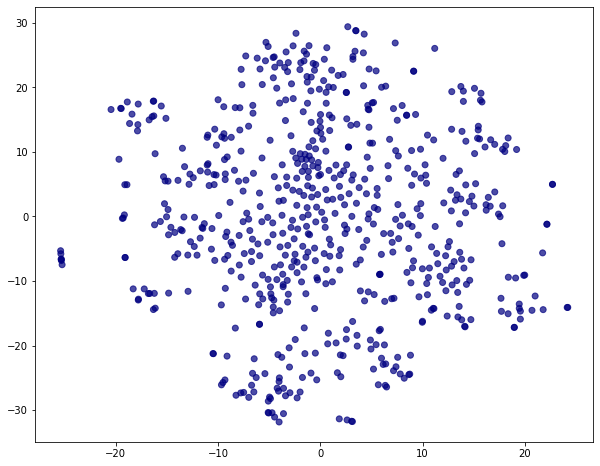

In [72]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

### Fasttext

In [73]:
len(text_lines)

58029

In [79]:
from gensim.models import FastText
model_fasttext = FastText(sentences=text_lines, size=128, window=5, min_count=0, sg=1, workers=4, iter=1)

2020-09-15 10:48:55,520 - resetting layer weights
2020-09-15 10:49:03,396 - collecting all words and their counts
2020-09-15 10:49:03,397 - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-09-15 10:49:03,797 - PROGRESS: at sentence #10000, processed 1608489 words, keeping 15404 word types
2020-09-15 10:49:04,244 - PROGRESS: at sentence #20000, processed 3307659 words, keeping 22551 word types
2020-09-15 10:49:04,749 - PROGRESS: at sentence #30000, processed 5846388 words, keeping 26657 word types
2020-09-15 10:49:05,254 - PROGRESS: at sentence #40000, processed 8720492 words, keeping 29559 word types
2020-09-15 10:49:05,654 - PROGRESS: at sentence #50000, processed 10978011 words, keeping 32949 word types
2020-09-15 10:49:06,039 - collected 35418 word types from a corpus of 13214284 raw words and 58029 sentences
2020-09-15 10:49:06,040 - Loading a fresh vocabulary
2020-09-15 10:49:06,098 - effective_min_count=0 retains 35418 unique words (100% of original 35418, d

In [81]:
# vocab size
words = list(model_fasttext.wv.vocab)
print("Vocabulary size %d" % len(words))

Vocabulary size 35418


In [80]:
model_fasttext.wv.most_similar("cmo")

2020-09-15 10:51:57,516 - precomputing L2-norms of word weight vectors
2020-09-15 10:51:57,548 - precomputing L2-norms of ngram weight vectors


[('mtg', 0.8134660720825195),
 ('enquiri', 0.8070444464683533),
 ('readdress', 0.7969772815704346),
 ('ecmo', 0.7969338297843933),
 ('deciscion', 0.7957319617271423),
 ('inquiri', 0.7943272590637207),
 ('privat', 0.7849199175834656),
 ('decisid', 0.7849057912826538),
 ('address', 0.7847398519515991),
 ('escal', 0.7833539843559265)]

In [83]:
# save model
# from gensim.test.utils import get_tmpfile
# fname = get_tmpfile("mm3_fasttext.model")
# model_fasttext.save(fname)
# ---------------------------
# model = FastText.load(fname)

2020-09-15 10:55:37,392 - adding document #0 to Dictionary(0 unique tokens: [])
2020-09-15 10:55:37,393 - built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2020-09-15 10:55:37,395 - saving FastText object under /tmp/mm3_fasttext.model, separately None
2020-09-15 10:55:37,396 - storing np array 'vectors_ngrams' to /tmp/mm3_fasttext.model.wv.vectors_ngrams.npy
2020-09-15 10:55:38,130 - not storing attribute vectors_ngrams_norm
2020-09-15 10:55:38,131 - not storing attribute vectors_norm
2020-09-15 10:55:38,132 - not storing attribute vectors_vocab_norm
2020-09-15 10:55:38,133 - not storing attribute buckets_word
2020-09-15 10:55:38,133 - storing np array 'vectors_ngrams_lockf' to /tmp/mm3_fasttext.model.trainables.vectors_ngrams_lockf.npy
2020-09-15 10:55:38,677 - {'uri': '/tmp/mm3_fasttext.model', 'mode': 'wb', 'buffering': -1, 'encoding': None, 'errors': None, 'newline': None, 'closefd': True, 'o

In [90]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in model_fasttext.wv:
        print(node)
    else:
        emb_list.append(model_fasttext.wv[node])



100%|██████████| 633/633 [00:00<00:00, 81812.97it/s]


In [91]:
emb_list

[array([-1.68860093e-01, -3.24422508e-01,  2.10775152e-01, -5.49536720e-02,
         4.09672290e-01,  1.35195062e-01, -4.62172806e-01, -3.74521762e-01,
         1.90797046e-01,  1.10165305e-01, -9.48491395e-02, -4.51007277e-01,
        -3.26822847e-01,  1.73185229e-01, -2.02176511e-01,  1.19540669e-01,
         2.31371984e-01, -3.87504876e-01, -1.05626486e-01, -3.46120864e-01,
         9.54513475e-02,  1.72264501e-02, -3.50552276e-02,  9.21304971e-02,
        -1.46323532e-01,  4.21358734e-01,  2.49741778e-01,  8.95265758e-01,
         1.36158857e-02, -3.77036184e-01, -3.12737018e-01,  1.55358329e-01,
        -4.58665937e-01,  5.34909032e-02, -3.27657819e-01,  3.65119688e-02,
        -4.48735446e-01,  1.95768669e-01,  2.03527555e-01,  1.03157580e-01,
         6.80100620e-01, -1.66678786e-01,  1.94882769e-02, -5.81826568e-01,
        -1.89680055e-01, -3.25465143e-01, -3.89969617e-01,  4.01634514e-01,
        -4.92875844e-01, -1.81247920e-01,  2.15096056e-01, -4.39118922e-01,
        -6.7

### Visualise Node Embeddings generated by fasttext

In [93]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs

# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [94]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [95]:
type(patient_node_embeddings)

numpy.ndarray

In [96]:
patient_node_embeddings.shape

(633, 128)

In [97]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

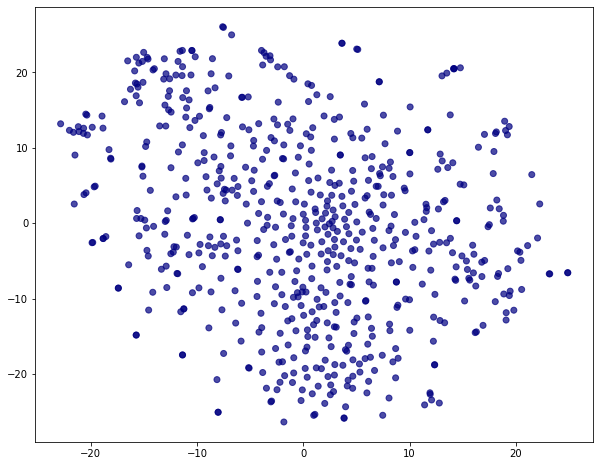

In [98]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

### GloVe

In [1]:
import bcolz
import pickle
import numpy as np
glove_path = 'glove.6B'

In [2]:
words = []
idx = 0
word2idx = {}
vectors = bcolz.carray(np.zeros(1), rootdir=f'{glove_path}/6B.100.dat', mode='w')

with open(f'{glove_path}/glove.6B.100d.txt', 'rb') as f:
    for l in f:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(np.float)
        vectors.append(vect)
    
vectors = bcolz.carray(vectors[1:].reshape((400000, 100)), rootdir=f'{glove_path}/6B.100.dat', mode='w')
vectors.flush()
pickle.dump(words, open(f'{glove_path}/6B.100_words.pkl', 'wb'))
pickle.dump(word2idx, open(f'{glove_path}/6B.100_idx.pkl', 'wb'))

In [2]:
vectors = bcolz.open(f'{glove_path}/6B.100.dat')[:]
words = pickle.load(open(f'{glove_path}/6B.100_words.pkl', 'rb'))
word2idx = pickle.load(open(f'{glove_path}/6B.100_idx.pkl', 'rb'))

glove = {w: vectors[word2idx[w]] for w in words}

In [23]:
# glove['dizzi']
glove['acv']

array([ 0.59858 , -0.18901 ,  0.15219 , -0.1239  , -0.5992  , -0.25007 ,
        0.02052 , -0.30508 ,  0.32092 , -0.35075 ,  0.21456 ,  0.022165,
        0.14087 ,  0.15718 ,  0.047841, -0.049434,  0.40446 , -0.31217 ,
        0.57536 , -0.2122  , -0.020801, -0.17498 , -0.57057 ,  0.25895 ,
        0.09802 , -0.14065 ,  0.035718,  0.060091,  0.19939 ,  0.26219 ,
        0.02355 ,  0.28449 , -0.21054 , -0.3698  ,  0.4972  , -0.48623 ,
        0.35206 ,  0.18299 ,  0.1803  , -0.1025  ,  0.19513 , -0.17329 ,
       -0.067295,  0.19528 ,  0.15156 , -0.42668 , -0.3449  ,  0.40674 ,
       -0.087653,  0.36288 , -0.020907,  0.51173 , -0.33155 , -0.14822 ,
        0.34912 ,  0.69362 , -0.011605, -0.13442 ,  0.047372, -0.27729 ,
        0.34717 , -0.4684  ,  0.22082 ,  0.077128, -0.24301 , -0.41158 ,
       -0.26899 , -0.52324 ,  0.18557 , -0.081617,  0.014583, -0.10388 ,
       -0.099195,  0.19658 , -0.21428 , -0.22014 ,  0.26814 , -0.26119 ,
        0.18067 ,  0.15859 , -0.5913  , -0.33512 , 

Make a dictionary of original words

In [9]:
from nltk.corpus import stopwords
# words that do not have meaning (can be modified later)
USELESS_WORDS = ["a", "the", "he", "she", ",", ".", "?", "!", ":", ";", "+", "*", "**"\
                 "your", "you"]

# count up the frequency of every word in every disease file
stemmer = PorterStemmer()
# create set of words to ignore in text
stop_words = set(stopwords.words('english'))

In [3]:
all_notes_df = pd.concat([alive_df, dead_df])

In [4]:
# Get all rows from clinical notes dataframe
rows = all_notes_df['TEXT'].values.tolist()

In [5]:
import re
# token = 'cp/dizzines'
token = 'breakfast'
word = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', token)
word = word_tokenize(word)
word

['breakfast']

In [19]:
# # Write patient list
# with open('patient_node_set_list.txt', 'w') as f:
#     f.write(json.dumps(list(patient_node_set)))
    
#Now read the file back into a Python list object
with open('patient_node_set_list.txt', 'r') as f:
    patient_node_set = json.loads(f.read())

In [44]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
orig_word_dict = dict((k, set()) for k in patient_node_set) 
for row in tqdm(rows):
    # Pre-processing
    # Get rid of punctuations
    _line = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row)
    # Tokenize note text
    tokens = word_tokenize(_line)
    words = [w for w in tokens if not w in stop_words]
    for word in words:
        stem_w = stemmer.stem(word.lower())
        if stem_w in orig_word_dict:
            orig_word_dict[stem_w].add(word.lower())
#             orig_word_dict[stem_w].add(lemmatizer.lemmatize(word).lower())

100%|██████████| 58029/58029 [06:38<00:00, 145.58it/s]


In [45]:
orig_word_dict

{'ardsnet': {'ardsnet'},
 'trazodon': {'trazodone'},
 'muir': {'muir', 'muire'},
 'abnl': {'abnl', 'abnls'},
 'contd': {'contd'},
 'acv': {'acv'},
 'occupi': {'occupied', 'occupies', 'occupy', 'occupying'},
 'dex': {'dex'},
 'arrest': {'arrest', 'arrested', 'arrests'},
 'metoclopramid': {'metoclopramide'},
 'dk': {'dk'},
 'unavail': {'unavailability', 'unavailable'},
 'mucinex': {'mucinex'},
 'neoplast': {'neoplastic'},
 'incent': {'incent', 'incentive'},
 'hook': {'hook', 'hooked'},
 'contractur': {'contracture',
  'contractured',
  'contractures',
  'contracturing'},
 'glycopyrrol': {'glycopyrrolate'},
 'familt': {'familt'},
 'perisplen': {'perisplenic'},
 'iddm': {'iddm'},
 'fdp': {'fdp', 'fdps'},
 'rm': {'rm'},
 'montitor': {'montitor'},
 'impli': {'implied', 'implies', 'imply', 'implying'},
 'quadrent': {'quadrent', 'quadrents'},
 'bill': {'billed', 'billing', 'bills'},
 'unrel': {'unrelated', 'unrelenting'},
 'ruptur': {'ruptur', 'rupture', 'ruptured', 'ruptures'},
 'lc': {'lc', 

For each word in dataset’s vocabulary, we check if it is on GloVe’s vocabulary. If it do it, we load its pre-trained word vector. Otherwise, we initialize a random vector.

In [6]:
import json

with open('orig_word_dict.json', 'r') as fp:
    orig_word_dict = json.load(fp)

with open('patient_node_set_list.txt', 'r') as f:
    patient_node_set = json.loads(f.read())


In [7]:
matrix_len = len(list(patient_node_set))
emb_dim = 100
glove_emb = {}
words_not_found = 0

for i, word in enumerate(list(patient_node_set)):
    try: 
        glove_emb[word] = glove[word]
    except KeyError:

        if any(w in glove for w in list(orig_word_dict[word])):
            for w in list(orig_word_dict[word]):
                if w in glove:
                    glove_emb[word] = glove[w]
                    break
        else:
            words_not_found += 1
            print(f"{word} : {list(orig_word_dict[word])}")
            glove_emb[word] = np.random.normal(scale=0.6, size=(emb_dim, ))
        
print(f"Words not found: {words_not_found}")

abnl : ['abnl', 'abnls']
contd : ['contd']
mucinex : ['mucinex']
glycopyrrol : ['glycopyrrolate']
familt : ['familt']
perisplen : ['perisplenic']
iddm : ['iddm']
montitor : ['montitor']
quadrent : ['quadrent', 'quadrents']
furhter : ['furhter']
ciwa : ['ciwas', 'ciwa']
nahco : ['nahco']
autopeep : ['autopeeping', 'autopeep']
lusb : ['lusb']
quiac : ['quiac']
tracheomalacia : ['tracheomalacia']
laminectomi : ['laminectomy', 'laminectomies']
aox : ['aox']
mortum : ['mortum']
grimmac : ['grimmacing', 'grimmace', 'grimmaces']
gastrojejunostomi : ['gastrojejunostomy']
ntnd : ['ntnd']
criticar : ['criticare']
scopalamin : ['scopalamine']
triadyn : ['triadyn', 'triadyne']
aglc : ['aglc']
lcw : ['lcws']
natg : ['natg']
argatroban : ['argatroban']
currenlti : ['currenlty']
autoset : ['autoset']
reguard : ['reguards', 'reguarding']
unasyn : ['unasyn']
peribronchovascular : ['peribronchovascular']
rescan : ['rescanned', 'rescan', 'rescanning', 'rescaned']
tcdb : ['tcdb']
treitz : ['treitz']
pyuri

### Visualise Node Embeddings generated by glove

In [29]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in glove_emb:
        print(node)
    else:
        emb_list.append(glove_emb[node])

100%|██████████| 633/633 [00:00<00:00, 245650.85it/s]


In [30]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs

# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [31]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [32]:
type(patient_node_embeddings)

numpy.ndarray

In [33]:
patient_node_embeddings.shape

(633, 100)

In [34]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

2020-09-24 17:33:57,350 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-09-24 17:33:57,354 - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,354 - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,355 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
2020-09-24 17:33:57,355 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
2020-09-24 17:33:57,356 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
2020-09-24 17:33:57,356 - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,357 - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,357 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBo

2020-09-24 17:33:57,386 - findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,387 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,387 - findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,388 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
2020-09-24 17:33:57,388 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
2020-09-24 17:33:57,389 - findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2020-09-24 17:33:57,389 - findfont: score(<Font 'Nuosu SIL' (NuosuSIL.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,390 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
2020-09-24 17:33:57,390 - findfont: scor

2020-09-24 17:33:57,419 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2020-09-24 17:33:57,420 - findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,420 - findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal 700 normal>) = 10.335
2020-09-24 17:33:57,421 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,421 - findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,422 - findfont: score(<Font 'PT Sans Narrow' (PTN77F.ttf) normal normal 700 condensed>) = 10.535
2020-09-24 17:33:57,422 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-09-24 17:33:57,423 - findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
2020-09-24 17:33:57,423 - findfont: score(<Font 'Lo

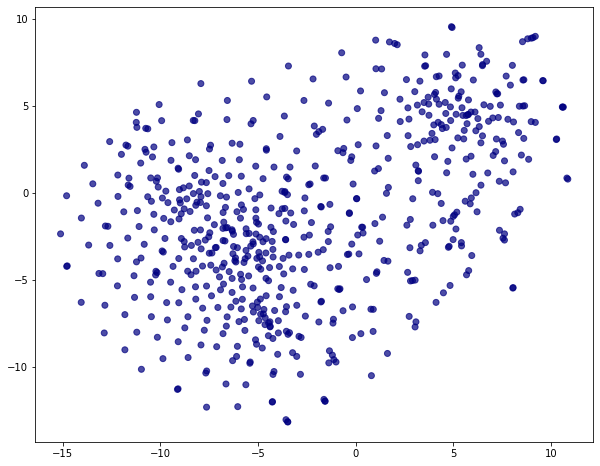

In [35]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()